1. Support Vector Machine
   2. Linear, Non linear or n-dimentional
   3. Line, plane and hyperplane
   2. Kernel function: low to high dimention
   3. Lambda function
   3. Regu... high and low 
   3. Subset of data points to support vector
   4. Difference btw svm and logistics regression
2. Implementation of Support Vector machine
3. Python List Comprehension

In [1]:
from pandas import*
from numpy import*
import pandas as pd
import numpy as np
from sklearn import*

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
can = load_breast_cancer()

In [4]:
can.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
can.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data = DataFrame(can.data,columns=can.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data['target'] = can.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
data[data.target == 1].head() #looking for target value 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [14]:
data['can class'] = data.target.apply(lambda x: can.target_names[x])
data.head() # looking for cancer class..or type

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,can class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [15]:
data[50:55] #slicing of dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,can class
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563,1,benign
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025,1,benign
52,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408,1,benign
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987,0,malignant
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873,0,malignant


In [16]:
data.shape

(569, 32)

In [ ]:
#plotting 

In [19]:
from matplotlib import*
import matplotlib.pyplot as plt

In [21]:
df1 = data[data.target == 0].head(50)
df2 = data[data.target == 1].head(50)

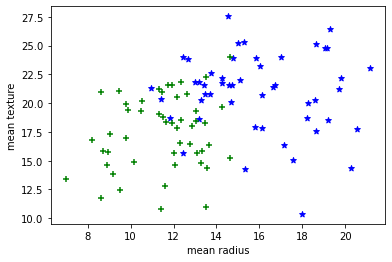

In [23]:
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(df1['mean radius'],df1['mean texture'], color = 'blue', marker = '*')
plt.scatter(df2['mean radius'],df2['mean texture'], color = 'green', marker = '+')
plt.show()

In [ ]:
# Model

In [26]:
from sklearn.model_selection import train_test_split

In [43]:
x = data.drop(['target', 'can class'], axis='columns') #we only want feaure
y = data.target

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 5)

In [45]:
len(xtrain) # rows for training

426

In [46]:
len(xtest)  # rows for testing

143

In [47]:
from sklearn.svm import SVC

In [48]:
model = SVC()

In [49]:
model.fit(xtrain,ytrain)

SVC()

In [50]:
model.score(xtest,ytest)# Score 

0.951048951048951

In [51]:
prediction = model.predict(xtest)

In [ ]:
#Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [54]:
cm = np.array(confusion_matrix(ytest,prediction))
cm

array([[48,  7],
       [ 0, 88]])

In [ ]:
# Tuning the parameter

In [57]:
model_c = SVC(C = 1)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.951048951048951

In [58]:
model_c = SVC(C = 10)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.9440559440559441

In [59]:
model_c = SVC(C = 5)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.9440559440559441

In [60]:
model_c = SVC(C = 2)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.958041958041958

In [61]:
#kernel?

In [62]:
model_kernel = SVC(kernel='linear')
model_kernel.fit(xtrain,ytrain)
model_kernel.score(xtest,ytest)

0.9790209790209791

#### applications
face detection
classification of images
handwriting detection
text and hypertext categorization

In [ ]:
# List Comprehension

In [63]:
squares = []
for i in range(10):
    squares.append(i*i)
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [64]:
square = [i*i for i in range(10)]
square

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
#[expression for x in list iterable]

In [65]:
m = [[j for j in range(3) for i in range(3)]]
print(m)

[[0, 0, 0, 1, 1, 1, 2, 2, 2]]


In [66]:
n = [[j for j in range(3)] for i in range(3)]
print(n)

[[0, 1, 2], [0, 1, 2], [0, 1, 2]]


In [67]:
l = [1,2,3,4]
new_l = [i**3 if i%2 == 0 else i**2 for i in l]
print(new_l)

[1, 8, 9, 64]
